# Introduction

Statistics is at the core of data science. Unfortunately, our knowledge of statistics is not where it should be. We are generally eager to try new state-of-the-art models. How could we not be? They look fancy, their performance is impressive, and, depending on the model, most data preprocessing steps are handled automatically. However, as these models advance, our control over the data decreases in two ways.

* First, even if we don't understand the data, these models work perfectly. Therefore, we assume we understand what is going on, but this is far from the truth.

* Second, we struggle to interpret the data. It is more convincing to show a regression line to a boss than to present an `XGBoost` tree.

As I progress in my data science career, I realized that if I want to be a good data scientist, I should master the fundamentals rather than always following trends. That was when I started learning statistics. This notebook is prepared from my notes and I have the following references:


1. Introduction to Modern Statistics ([Link](https://openintro-ims.netlify.app/))

2. Understanding Statistics and Experimental Design: How to Not Lie with Statistics ([Link](https://www.amazon.com.tr/Understanding-Statistics-Experimental-Design-Biosciences/dp/3030034984))

3. MarinStatsLectures-R Programming & Statistics ([Link](https://www.youtube.com/@marinstatlectures))


4. The Art of Statistics: Learning from Data ([Link](https://www.amazon.com.tr/Learning-Data-Statistics-David-Spiegelhalter/dp/0241258766))


5. Statistics for Business & Economics ([Link](https://www.amazon.com/Statistics-Business-Economics-David-Anderson/dp/1337901067))

6. Computer Age Statistical Inference: Algorithms, Evidence, and Data Science ([Link](https://www.amazon.com/Computer-Age-Statistical-Inference-Mathematical/dp/1107149894))

I hope readers find this notebook useful and educational.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.datasets import make_classification

# 1.Sampling

In statistics, we are interested in certain population statistics. However, to obtain these population statistics, we need data from the entire population. Often, this is not feasible. This is where sampling comes into play. If the sample has similar characteristics to the population, a sample statistic can represent the population statistic within a margin of error.

There are many sampling techniques. I will show a few among those:

## 1.1. Random Sampling

Random sampling refers to gathering data points from the population randomly. Most of the time, it is the best way to ensure that the sample appropriately represents the population.

In [2]:
population = np.random.randint(0,100,1000)
sample = np.random.choice(population,size = 100)
sample

array([80,  0, 17, 53, 41, 22, 61, 38, 67, 36,  3, 77,  9, 51, 31, 54, 83,
       25, 17, 63, 22, 55, 77, 13, 69, 42, 94, 53, 38, 34, 59, 50, 16, 99,
       36, 86, 50, 95,  1, 97, 25, 47, 81, 48, 67, 38, 53, 54, 41, 33, 45,
       16, 47,  9, 60,  4, 81, 31, 51, 38, 78, 81, 98, 47, 61, 91, 51, 20,
       29,  4, 86, 29,  0, 68,  8, 25, 20, 21,  1, 65, 53, 51, 57, 22, 39,
        2, 92, 33,  9, 30, 34,  2, 62, 87, 36, 92, 97, 56, 29, 85])

## 1.2. Stratified Sampling

Stratified sampling is extremely useful when the population is imbalanced. In such cases, if we sample randomly, there is a high chance that minority groups will be underrepresented. Therefore, we divide the population into subcategories and randomly sample from each of them.

In [3]:
np.random.seed(42)
population = np.array(100*[1] + 900*[0])
np.random.shuffle(population)

ones = population[np.where(population == 1)]
zeros = population[np.where(population == 0)]
proportion = len(ones) / len(zeros)
sample_size = 100

sample1 = np.random.choice(ones,size = int(proportion*sample_size))
sample0 = np.random.choice(zeros,size = int((1-proportion)*sample_size))
sample = np.concatenate((sample0,sample1))
sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 1.3. Cluster Sampling

Cluster sampling is useful when the population is very large. We divide the population into clusters based on a specific attribute, select clusters randomly, and use all the samples within these clusters to represent the population.

In [4]:
np.random.seed(42)

data = {
    'Adana': np.random.randint(0,100,100),
    'İstanbul': np.random.randint(0,100,100),
    'Ankara': np.random.randint(0,100,100),
    'Antakya': np.random.randint(0,100,100),
    'Malatya': np.random.randint(0,100,100),
    'Yozgat': np.random.randint(0,100,100),
}

clusters = 3

random_clusters = np.random.choice(list(data.keys()), size = 3, replace = False)
sample = np.array([data[random_cluster] for random_cluster in random_clusters]).ravel()
sample

array([25, 88, 59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10,
       80,  7, 34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61,
       87, 36, 98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,
        8, 78, 14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28,
       35, 12, 31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83,
       29, 61, 74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26,  8, 61,
       36, 96, 50, 43, 23, 78, 58, 31, 95, 87, 51, 61, 57, 51, 11, 38,  1,
        2, 55, 80, 58,  1,  1, 91, 53, 86, 95, 96,  0, 18,  1, 52, 43, 89,
       31, 69, 31, 67, 54, 74, 55, 16, 37, 23, 68, 97, 69, 85, 10, 15, 96,
       72, 58, 69, 79, 92,  2, 19, 58, 35, 18, 89, 66, 18, 19, 95, 70, 51,
       32, 39, 38, 81,  0, 10, 91, 56, 88, 49, 22, 30, 93, 41, 98,  6, 15,
       89, 59,  1,  0, 47, 11, 68, 36, 31,  8, 98, 18, 47, 51, 92, 14, 71,
       60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1, 87, 29, 37,  1,
       63, 59, 20, 32, 75

## 1.4. Getting More Out of a Sample: Bootstrap Sampling

Sampling repeatedly from a population is often neither cheap nor convenient. Fortunately, we can get more out of a single sample by applying bootstrap sampling.

Bootstrap sampling refers to sampling randomly $n$ data points from a sample having $n$ data points *with replacement*. It is extremely useful to measure the variability of a point estimate because when we simulate enough number of bootstrap simulations Central Limit Theorem (CLT) kicks in and we obtain a normal distribution. Let's see an example:

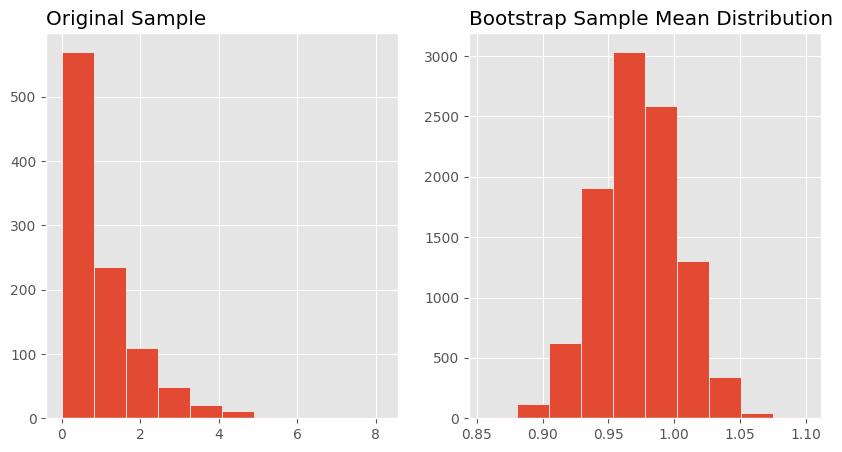

In [5]:
sample = stats.expon.rvs(size = 1000,random_state = 42)
boots = stats.bootstrap((sample,),statistic = np.mean,random_state = 42)
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].hist(sample,edgecolor = "white")
ax[0].set_title("Original Sample",loc = 'left')
ax[1].hist(boots.bootstrap_distribution,edgecolor = "white")
ax[1].set_title("Bootstrap Sample Mean Distribution",loc = 'left')
fig.show()

There are a couple of ways to obtain a confidence interval from the bootstrap distribution.

The first one is using means and standard deviations. As you may remember from the statistics class 95% of the area under a normal distribution lies between approximetely two standard deviations away from the mean:

$CI_{boot} = \mu_{boot} \pm z^{\star} × \sigma_{boot}$

In [6]:
dist = boots.bootstrap_distribution.copy()
mu = dist.mean()
sigma = dist.std()
ci95 = (mu-1.96*sigma,mu+1.96*sigma)
ci95

(0.9125624592020178, 1.0325836036024476)

we can also use percentiles for the same purpose.

In [7]:
ci95_percentile = (np.percentile(dist,2.5),np.percentile(dist,97.5))
ci95_percentile

(0.9119063572938082, 1.0327692341229757)

We can also use *bias-corrected and accelerated bootstrap confidence interval* which is supported by bootstrap function:

In [8]:
ci_bca = boots.confidence_interval
ci_bca

ConfidenceInterval(low=0.9140462104451859, high=1.0343993438651762)

# 2.Statistical Inference for a Single Population

When making inferences about a population parameter, such as the mean, we can use **bootstrapping** to generate confidence intervals. Let's start with an example:

We are interested in the mean of a certain population, but due to financial constraints, we were able to collect only 30 data points.

## 2.1. Statistical Inference Using Bootstrap Sampling

### 2.1.1. Bootstrap Sampling on Continuous Random Variables

In [9]:
np.random.seed(42)
population = np.concatenate((np.random.randint(0,100,10000),
                             np.random.randint(0,30,10000)))
sample = np.random.choice(population,size = 30)
sample_mean = np.mean(sample)
sample_mean

39.166666666666664

The sample mean is 39.16. Should we assume that the sample mean is the same as the population mean? We can do better than this.

Instead of assuming that the sample represents the population *perfectly*, we will use bootstrap sampling to provide our estimate as a range rather than a single point estimate.


In [10]:
boots = stats.bootstrap((sample,),statistic = np.mean,random_state = 42)
boots.confidence_interval

ConfidenceInterval(low=29.033333333333335, high=50.93333333333333)

So we are 95% confident that true population statistic (mean in this case) lies between 29 and 50.9. Let's reveal the truth and see whether this inference is true:

In [11]:
population.mean()

31.9652

Much better. This experiment shows the logic of frequentist statistic. Frequentists acknowledge the variability when a certain task is repeated many times. Therefore they make their inferences considering this fact.

### 2.1.2. Bootstrap Sampling on Proportions

We can apply the same procedure on proportions. Let's say we have a sample consisting of a sequence of Bernoulli trials. We want to make inferences about the population proportion.

ConfidenceInterval(low=0.38, high=0.66)


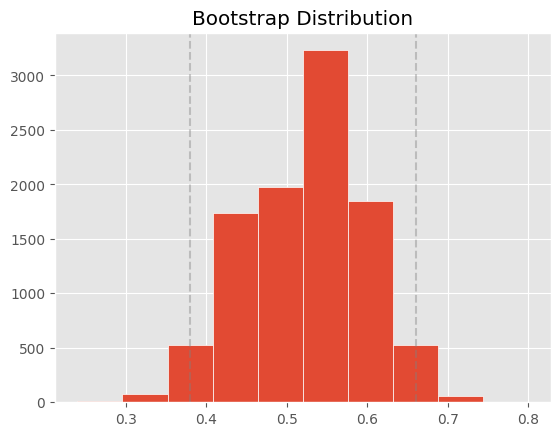

In [12]:
np.random.seed(42)
population = stats.bernoulli.rvs(p = 0.5,size = 1000, random_state = 42)
sample = np.random.choice(population,size = 50)

boots = stats.bootstrap((sample,),statistic = np.mean,random_state = 42)
print(boots.confidence_interval)
plt.figure()
plt.hist(boots.bootstrap_distribution,edgecolor = 'white',bins = 10)
plt.axvline(x = boots.confidence_interval.low, color = 'grey', alpha = 0.4,linestyle = "--")
plt.axvline(x = boots.confidence_interval.high, color = 'grey', alpha = 0.4,linestyle = "--")
plt.title("Bootstrap Distribution")
plt.show()

From the bootstrap simulation, we can conclude that the true population parameter is 95% likely to be in $(0.38,0.66)$ range. Let's reveal the truth:

In [13]:
population.mean()

0.497

## 2.2. Statistical Inference With Analytical Methods

### 2.2.1. Normal Assumption on Proportions

Let's continue with the last example. This time we will calculate the confidence intervals using Gaussian assumption.

In this case, if sucess (1) and failure (0) conditions both have at least 10 data points (the more the better), then we can assume that the distribution is *approximetely* normal. We can use the following terms:

Standard error:

$SE = \sqrt{\frac{{\hat{p} \times (1 - \hat{p})}}{n}}$ where $\hat{p}$ refers to the sample proportion.

Error margin:

$EM = z^{\star} \times \sqrt{\frac{{\hat{p} \times (1 - \hat{p})}}{n}}$

where $z^{\star}$ refers to the desired confidence level.

Ex:

$CI_{95}$: $z^{\star} = 1.96$


In [14]:
np.random.seed(42)
population = stats.bernoulli.rvs(p = 0.5,size = 1000, random_state = 42)
sample = np.random.choice(population,size = 50)

np.unique(sample,return_counts = True)

(array([0, 1]), array([24, 26]))

Perfect! Since we have more than 10 data points for each group we can assume that the distribution is approximetely normal.

In [15]:
z = 1.96

sample_proportion = sample.mean()
se = np.sqrt(sample_proportion * (1 - sample_proportion) / len(sample))
ci = (sample_proportion - z * se, sample_proportion + z * se)
ci

(0.3815179896159794, 0.6584820103840207)

As you can see, we obtained the same result with the previous one.

### 2.2.2. T-distribution for Continuous Random Variables

A perfect normal distribution is hard to obtain, especially with low sample sizes. In these cases, we use *t-distribution* for confidence interval calculation.

You can think t-distribution as a normal distribution with fatter tails. It has an additional parameter $\nu$, which refers to the degree of freedom (dof). As dof increases, the t-distribution converges to a normal distribution. For a single sample:

$\nu = n-1$ where $n$ refers to the sample size.

$\alpha = 0.05\quad$ for 95% confidence

$SE = \frac {s} {\sqrt{n}}$ where $s$ refers to the sample standard deviation.

$CI = \bar{x} \pm t_{\alpha/2,\nu} \times SE \quad$    for two-sided CI





We will use the same example in Section 2.1.1.

In [16]:
np.random.seed(42)
population = np.concatenate((np.random.randint(0,100,10000),
                             np.random.randint(0,30,10000)))
sample = np.random.choice(population,size = 30)
sample_mean = np.mean(sample)
sample_mean

39.166666666666664

In [17]:
se = sample.std(ddof=1) / np.sqrt(len(sample))
dof = len(sample) - 1
t_val = stats.t.ppf(0.975,dof)
ci = (sample_mean - t_val * se, sample_mean + t_val * se)
ci

(27.481696605304393, 50.851636728028936)

# 3.Statistical Inference for Two Population

To find an evidence, we often have to work with more than one group. In this section, we will look at the statistical methods that are used while comparing two groups.

## 3.1. Statistical Inference Using Bootstrap Sampling



### 3.1.1. Computing Confidence Intervals Using Point Estimates

#### 3.1.1.1. Computing Confidence Intervals for Paired Samples

Let's say we want to find an evidence about the effectiveness of a new treatment by comparing cholesterol levels in the same group of individuals under two conditions: one month with treatment and one month without treatment (control).

This is a paired experiment setup. We can apply bootstrap sampling in the following way:

* Subtract treatment and control group result from each other so the problem becomes a one sample problem.

* Sample repeatedly with replacement to obtain a difference distribution.

* See whether 0 is in the confidence interval. If it is, then conclude that more evidence is needed to convince that this new treatment is effective.

$H_0: \mu_{diff} = 0$

$H_1: \mu_{diff} \neq 0$

ConfidenceInterval(low=-7.374056241119226, high=-3.0338954436866654)


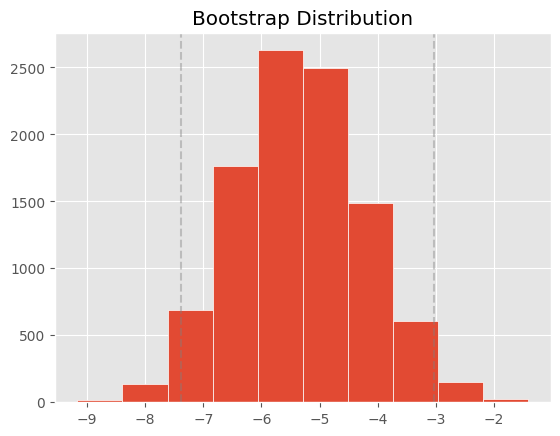

In [18]:
np.random.seed(42)
cholesterol_treatment = np.random.normal(loc = 200, scale = 5, size = 30)
cholesterol_control = np.random.normal(loc = 205, scale = 5, size = 30)

diff = cholesterol_treatment - cholesterol_control
boots = stats.bootstrap((diff,),statistic = np.mean,random_state = 42)

print(boots.confidence_interval)
plt.figure()
plt.hist(boots.bootstrap_distribution,edgecolor = 'white',bins = 10)
plt.axvline(x = boots.confidence_interval.low, color = 'grey', alpha = 0.4,linestyle = "--")
plt.axvline(x = boots.confidence_interval.high, color = 'grey', alpha = 0.4,linestyle = "--")
plt.title("Bootstrap Distribution")
plt.show()


0 is not in the confidence interval therefore:

* We are 95% confident that new treatment is effective.

Alternatively we can use the code below:

In [19]:
boots = stats.bootstrap((cholesterol_treatment,cholesterol_control),statistic = lambda x,y: np.mean(x) - np.mean(y),random_state = 42,
                        paired = True)
print(boots.confidence_interval)

ConfidenceInterval(low=-7.374056241119214, high=-3.0338954436866703)


#### 3.1.1.2. Computing Confidence Intervals for Independent Samples

Now suppose that we are comparing two *independent* samples. To compare groups with bootstrapping, we will use the following procedure:

* Sample from both groups repeatedly with replacement.
* Subtract the point estimates from each other.
* Repeat previous two steps many times to obtain a Gaussian distribution.
* Make inferences like we did in the section 3.1.1.1.

Comparing cumulative gpa average of schools a and b:

$H_0: \mu_a = \mu_b$

$H_1: \mu_a \neq \mu_b$

(-1.6175461990267708, 2.9156933554800153)


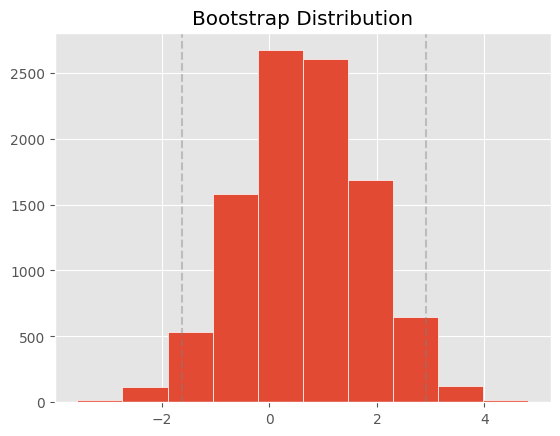

In [20]:
np.random.seed(42)

school_a_cpga = np.random.normal(loc = 10, scale = 5, size = 30)
school_b_cpga = np.random.normal(loc = 9, scale = 5, size = 30)

n_simulations = 10000
diff = []

for _ in range(n_simulations):
    sample_a = np.random.choice(school_a_cpga,size = len(school_a_cpga),replace = True)
    sample_b = np.random.choice(school_b_cpga,size = len(school_b_cpga),replace = True)
    diff.append(np.mean(sample_a) - np.mean(sample_b))

diff = np.array(diff)
print(f'({np.percentile(diff,2.5)}, {np.percentile(diff,97.5)})')
plt.figure()
plt.hist(diff,edgecolor = 'white',bins = 10)
plt.axvline(x = np.percentile(diff,2.5), color = 'grey', alpha = 0.4,linestyle = "--")
plt.axvline(x = np.percentile(diff,97.5), color = 'grey', alpha = 0.4,linestyle = "--")
plt.title("Bootstrap Distribution")
plt.show()


Since 0 in our confidence interval:

* We can't say that the grades of the students are different from each other.

Alternatively we can use the following code:

In [21]:
boots = stats.bootstrap((school_a_cpga,school_b_cpga),
                        statistic = lambda x,y: np.mean(x) - np.mean(y),
                        random_state = 42,
                        paired = False)
print(boots.confidence_interval)

ConfidenceInterval(low=-1.562673653014612, high=2.9679703235065444)


### 3.1.2. Computing Confidence Intervals Using T-Percentiles

Alternative to the previous solution, we can use t-statistic bootstrap distribution to compute CI ($6^{th}$ reference page 195). Remember the t-statistic (for independent samples):

$t = \frac {\mu_1 - \mu_2} {s/\sqrt{n}}$

or the more robust form for samples having different variances:

$t = \frac {\mu_1 - \mu_2} {\sqrt{\frac {s_1^2} {n_1} + \frac {s_2^2} {n_2}}}$


In this method, we will apply the following:

* Sample repeatedly from the groups.
* Compute t-statistic each time and record the value elsewhere.
* Get appropriate percentiles of the t-distribution to compute the confidence inteval.

In [22]:
def compute_t_stat(first_sample,second_sample):
   mean_diff = np.mean(first_sample) - np.mean(second_sample)
   se_diff = np.sqrt(np.var(first_sample,ddof = 1)/len(first_sample) + np.var(second_sample,ddof = 1)/len(second_sample))
   return mean_diff / se_diff

In [23]:
np.random.seed(42)

school_a_cpga = np.random.normal(loc = 10, scale = 5, size = 30)
school_b_cpga = np.random.normal(loc = 9, scale = 5, size = 30)

num_iterations = 10000
t_stats = []

for _ in range(num_iterations):
    sample_a = np.random.choice(school_a_cpga,size = len(school_a_cpga),replace = True)
    sample_b = np.random.choice(school_b_cpga,size = len(school_b_cpga),replace = True)
    t_stats.append(compute_t_stat(sample_a,sample_b))

t_stats = np.array(t_stats)
print(f'({np.percentile(t_stats,2.5)}, {np.percentile(t_stats,97.5)})')

(-1.4440762106046217, 2.5296565164177074)


## 3.2. Statistical Inference with Analytical Methods

Let's go back to the cholesterol example again (Section 3.1.1.1). This time we will compare the groups using `t-test`. Since the groups are paired, we will use paired t-test. However, before using t-test, the following assumptions have to be met:

- The samples are independent.
* Both distributions have somewhat similar variances (If not we have to use `Welch t-test`).
* Both distributions are *somewhat* Gaussian.

We know that the samples are independent but we have to look at the data for the second and third assumptions.

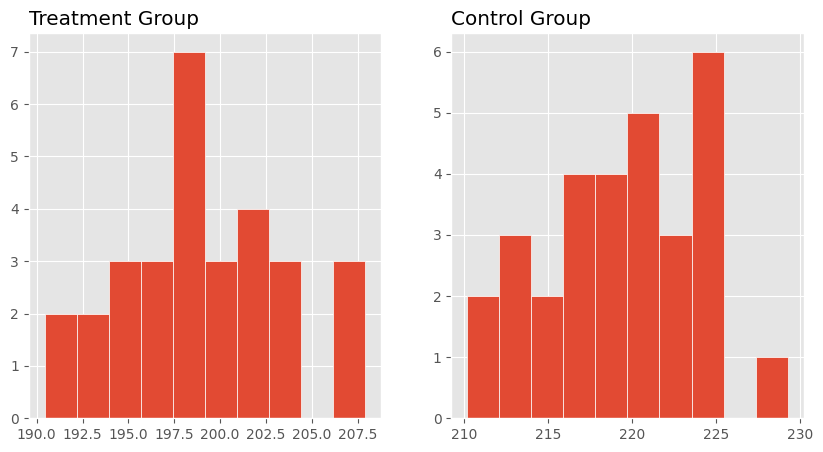

In [24]:
np.random.seed(42)
cholesterol_treatment = np.random.normal(loc = 200, scale = 5, size = 30)
cholesterol_control = np.random.normal(loc = 220, scale = 5, size = 30)

fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].hist(cholesterol_treatment,edgecolor = 'white')
ax[0].set_title('Treatment Group',loc = 'left')
ax[1].hist(cholesterol_control,edgecolor = 'white')
ax[1].set_title('Control Group',loc = 'left')
plt.show()

Both datasets are somewhat normal (There are no extreme points). Don't forget, we are not searching for a perfect normality condition. T-test is robust enough to handle these imperfectnesses.

For variance comparison, we can use `Bartlett test`.

$H_0:$ The groups have different variances.

$H_1:$ The groups don't have different variances.


In [25]:
stats.bartlett(cholesterol_treatment,cholesterol_control)

BartlettResult(statistic=0.032885799842366566, pvalue=0.8560972393128001)

The p-value is greater than p-critical (0.05), therefore we can assume that the groups have similar variances.

All the conditions are met. We can use t-test then. For paired samples,

$d = d_1,d_2 ....,d_n$ where $d$ refers to the pair differences.

$s_d:$ Standard deviation of the differences.

$SE_d = \frac {s_d} {\sqrt{n}}\quad$: Standard error

$t = \frac {d} {SE_d}$

In [26]:
diff = cholesterol_treatment - cholesterol_control
se_diff = np.std(diff,ddof = 1) / np.sqrt(len(diff))
t_diff = np.mean(diff) / se_diff
t_diff

-18.11987645295346

We can look at the tables to find the p-value. Alternatively we can use `ttest_rel`.

In [27]:
ttest_result = stats.ttest_rel(cholesterol_treatment,cholesterol_control)
print(ttest_result)

TtestResult(statistic=-18.119876452953452, pvalue=2.3410619252913918e-17, df=29)


We can conclude that both groups are different from each other. (p-value < p-critical = 0.05)

## 3.3. Evaluating the Differences Using Permutation Tests

Permutation tests are extremely useful while working with small sample sizes. We use these tests to determine whether an observed difference in point estimates is due to chance. Here are the steps:

* Record observed difference in point estimates.

For many times,

* Combine and shuffle the data.
* Distribute the data to the groups randomly.
* Check whether absolute value of the iteration difference is larger than absolute value of the observed difference. (Assuming the test is two-sided)
* Count how many times the iteration difference exceeds observed difference.
* Depending on the desired confidence level, evaluate the results.

p-value: 0.0003


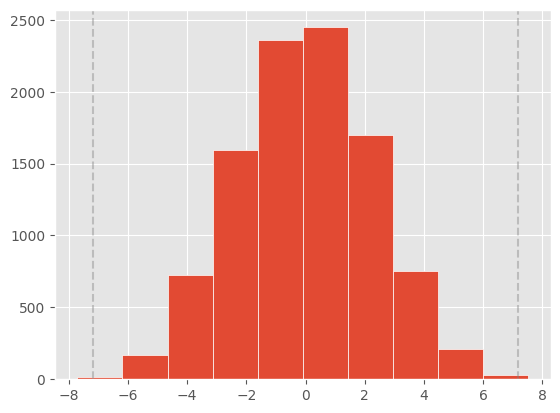

In [28]:
np.random.seed(42)
sample_a = np.random.normal(loc = 10, scale = 5, size = 10)
sample_b = np.random.normal(loc = 9, scale = 5, size = 10)
observational_difference = np.mean(sample_a) - np.mean(sample_b)
p_value = 0

n_simulations = 10000
iteration_differences = []

for _ in range(n_simulations):
    combined_sample = np.concatenate((sample_a,sample_b))
    np.random.shuffle(combined_sample)
    sample_a_temp = combined_sample[:len(sample_a)]
    sample_b_temp = combined_sample[len(sample_a):]
    iter_difference = np.mean(sample_a_temp) - np.mean(sample_b_temp)
    iteration_differences.append(iter_difference)
    if np.abs(iter_difference) >= np.abs(observational_difference):
        p_value += 1

p_value /= n_simulations
print(f"p-value: {p_value}")

plt.figure()
plt.hist(iteration_differences,edgecolor = "white",bins = 10)
plt.axvline(x = observational_difference, color = 'grey', alpha = 0.4,linestyle = "--")
plt.axvline(x = -observational_difference, color = 'grey', alpha = 0.4,linestyle = "--")
plt.show()

The p-value is smaller than the p-critical (0.05). Hence, we can conclude that means of these two groups are different from each other.

Alternatively, we can use the following code:

In [29]:
results = stats.permutation_test((sample_a,sample_b),
                       statistic = lambda x,y: np.mean(x) - np.mean(y),
                       n_resamples = 10000,
                       alternative = "two-sided",
                       random_state = 42)
results.statistic,results.pvalue

(7.193596731405851, 0.0005999400059994001)

# 4.Statistical Inference for Multiple Populations

In this section, we will look at the statistical methods that are used while comparing more than two groups.

## 4.1. Sequential Comparisons

The naive approach while comparing multiple groups is to use t-tests sequentially. For example, while comparing groups A, B, and C, we can compare (A, B), (B, C), and (A, C) one by one.

This approach has a downside. Normally, for each test, we settle for making Type 1 error rate of $\alpha$ (equivalent to $p_{critical}$). However, as the number of test increases, the cumulative error rate (named as familywise error rate) also grows. For instance, if we select $\alpha = 0.05$, then the probability of not making Type 1 error rate becomes $0.95$. For three sequential tests, this probability reduces to

$0.95^3 ≈ 0.85$

Therefore, to keep familywise error rate (FWER) below $\alpha$, we need to make some adjustments.

### 4.1.1. Corrective Methods for Hypothesis Testing

There are many correction methods for sequential comparisons. I will only show two of them in this notebook. For more information please refer [this](https://en.wikipedia.org/wiki/Family-wise_error_rate) page.
   

#### 4.1.1.1. Bonferroni Correction

For $m$ number of tests conducted given the dataset, $\alpha$ should be divided to $m$:

$\alpha ← \frac \alpha m$

In [30]:
alpha_critical = 0.05
alpha_new = alpha_critical/3
alpha_new

0.016666666666666666

$(1-0.0167)^3 = 0.95$

As you can see with Bonferroni Correction FWER is kept at $0.05$.

#### 4.1.1.2. Šidák Correction

For $m$ number of tests conducted given the dataset, $\alpha$ should be adjusted using the formula below:

$\alpha ← 1-(1-\alpha)^{1/m}$

In [31]:
alpha_critical = 0.05
alpha_new = 1-(1-alpha_critical)**(1/3)
alpha_new

0.016952427508441503

$(1-0.0169)^3 ≈ 0.95$

### 4.1.2. Downsides of Correction Methods

Before discussing the downsides of correction methods, let's define Type 1 and Type 2 errors.

Type 1 error is rejecting $H_0$ when $H_0$ is the case. It is often denoted by $\alpha$.

Type 2 error is not rejecting $H_0$ even $H_1$ is the case. It is often denoted by $β$.

Power of a test refers to rejecting $H_0$. It is formulated by $1-\beta$.

Type 1 and Type 2 errors are inversely correlated. As tendency of rejecting $H_0$ increases, Type 2 error rate decreases and Type 1 error rate increases. The opposite is also true. As the test becomes more insensitive for rejecting $H_0$, its probability of making Type 1 error decreases, but this time the probability of making Type 2 error increases:

$α \uparrow β ↓$ Power $\uparrow$

$α \downarrow β \uparrow$ Power $\downarrow$


 We want our test not to suffer too much from both of these errors. Therefore, we have to carefully select parameters such as sample size and
$\alpha$. The correction methods can disturb the balance. In other words, as we make $\alpha$ smaller, the probability of a single test suffering from a Type 2 error increases.

In the next section, we will see an alternative method for multiple group comparison.



## 4.2. Analysis of Variance (ANOVA)

**Note:** I will show only one way ANOVA layout in this notebook.  

ANOVA is a statistical test used for comparing multiple groups. To conduct ANOVA test, the following conditions have to be met:

* Samples are independent.
* Samples have similar variances.
* Samples have somewhat Gaussian distribution.

When comparing $k$ groups, we can set up the null and alternative hypotheses for ANOVA as follows:

$H_0: \mu_1 =\mu_2 = ... \mu_k$

$H_1:$ At least one mean is different.

Let's make an example. We will compare 3 groups. The first step is to check requirements of ANOVA:


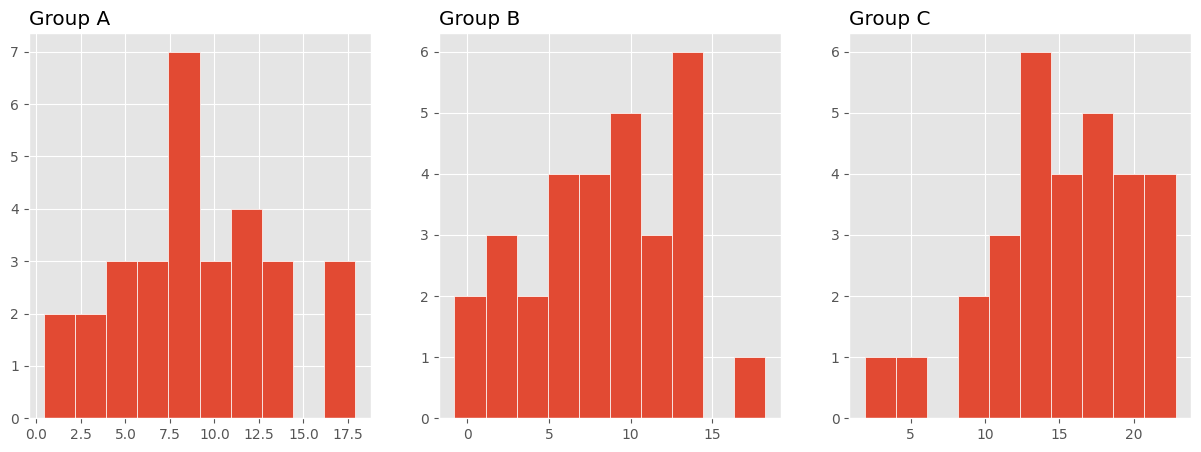

In [32]:
np.random.seed(42)
group_a = np.random.normal(loc = 10, scale = 5, size = 30)
group_b = np.random.normal(loc = 9, scale = 5, size = 30)
group_c = np.random.normal(loc = 15, scale = 5, size = 30)

fix,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].hist(group_a,edgecolor = 'white')
ax[0].set_title('Group A',loc = 'left')
ax[1].hist(group_b,edgecolor = 'white')
ax[1].set_title('Group B',loc = 'left')
ax[2].hist(group_c,edgecolor = 'white')
ax[2].set_title('Group C',loc = 'left')
plt.show()

Let's analyze the variances:

In [33]:
stats.bartlett(group_a,group_b,group_c)

BartlettResult(statistic=0.2810306157066885, pvalue=0.8689103636785533)

The groups have *somewhat* Gaussian distribution and they have similar variances. So we can use ANOVA. The formulas for we need to use for this problem:

Groups: $A,B,C$ ($k = 3$)

Sample sizes: $n_A,n_B,n_C = 30$

Sample means: $\bar{X}_A,\bar{X}_B,\bar{X}_C$

Global Mean (GB): mean of all the data points

$SS_{between} = n_A(\bar{X}_A - GB)^2 + n_B(\bar{X}_B - GB)^2 + n_C(\bar{X}_C - GB)^2$

$SS_{within} = \sum_{i = 1}^{n_A}(x_i - \bar{X}_A)^2 + \sum_{i = 1}^{n_B}(x_i - \bar{X}_B)^2 + \sum_{i = 1}^{n_C}(x_i - \bar{X}_C)^2$

$dof_{between} = k-1 = 2$

$dof_{within} = n_A + n_B + n_c - k = 87$

$MS_{between} = \frac {SS_{between}} {dof_{between}}$

$MS_{within} = \frac {SS_{within}} {dof_{within}}$

$F = \frac {MS_{between}}{MS_{within}}$

**Note:** I used open forms of the equations because close forms can be overwhelming.


In [34]:
all_data = np.concatenate([group_a, group_b, group_c])
k = 3

n_a = len(group_a)
n_b = len(group_b)
n_c = len(group_c)

mean_a = np.mean(group_a)
mean_b = np.mean(group_b)
mean_c = np.mean(group_c)

global_mean = np.mean(all_data)

SS_between = (n_a * (mean_a - global_mean) ** 2 + \
              n_b * (mean_b - global_mean) ** 2 + \
              n_c * (mean_c - global_mean) ** 2)

SS_within = (np.sum((group_a - mean_a) ** 2) + \
             np.sum((group_b - mean_b) ** 2) + \
             np.sum((group_c - mean_c) ** 2))

df_within = len(all_data) - 3
df_between = k - 1

MS_within = SS_within / df_within
MS_between = SS_between / df_between

F_statistic = MS_between / MS_within

print(f"F-statistic: {F_statistic}")
print(f"p-value: {1-stats.f.cdf(F_statistic,df_between,df_within)}")
print(f"df_between: {df_between}")
print(f"df_within: {df_within}")
print(f"SS_between: {SS_between}")
print(f"SS_within: {SS_within}")
print(f"MS_between: {MS_between}")
print(f"MS_within: {MS_within}")

F-statistic: 18.263024265301787
p-value: 2.3855614428303085e-07
df_between: 2
df_within: 87
SS_between: 809.963064320001
SS_within: 1929.2200889674407
MS_between: 404.9815321600005
MS_within: 22.174943551349894


P-value of the test is smaller than p-critical (0.05). Therefore we can conclude that the mean of at least one group is different from the rest. We will figure out which one(s) is/are different in the next section. But first, let's look at the shortcut methods for ANOVA:

In [35]:
stats.f_oneway(group_a,group_b,group_c)

F_onewayResult(statistic=18.263024265301784, pvalue=2.385561442783779e-07)

For more detailed result, we can use `statmodels` module.

In [36]:
data = {
    'values': np.concatenate([group_a, group_b, group_c]),
    'group': ['A'] * len(group_a) + ['B'] * len(group_b) + ['C'] * len(group_c)
}
df = pd.DataFrame(data)
model = ols('values ~ C(group)', data=df).fit()

anova_table = anova_lm(model)
print(anova_table)

            df       sum_sq     mean_sq          F        PR(>F)
C(group)   2.0   809.963064  404.981532  18.263024  2.385561e-07
Residual  87.0  1929.220089   22.174944        NaN           NaN


## 4.3. Post-Hoc Analysis

A post-hoc analysis should be performed to understand which group(s) is/are different from the rest. There are multiple ways to do it. Personally, I have only used  `Tukey HSD` so far. It works fine and it is supported by `scipy.stats`. For the detailed explanation, you can refer [this](https://astatsa.com/OneWay_Anova_with_TukeyHSD/) page.

In [37]:
np.random.seed(42)
group_a = np.random.normal(loc = 10, scale = 5, size = 30)
group_b = np.random.normal(loc = 9, scale = 5, size = 30)
group_c = np.random.normal(loc = 15, scale = 5, size = 30)

print(stats.tukey_hsd(group_a,group_b,group_c))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.665     0.848    -2.234     3.564
 (0 - 2)     -6.005     0.000    -8.904    -3.106
 (1 - 0)     -0.665     0.848    -3.564     2.234
 (1 - 2)     -6.670     0.000    -9.569    -3.771
 (2 - 0)      6.005     0.000     3.106     8.904
 (2 - 1)      6.670     0.000     3.771     9.569



Each row represents a pairwise comparison. We can use p-values to determine which group(s) is/are different from the others. From the results, we can conclude that the third group is different from the rest.

# 5.Statistical Inference for Categorical Variables

While comparing categorical variables, `chi-square test of independence` is used. This test compares the expected and observed frequencies for evaluation. The test has a couple of assumptions:

* The groups in comparison are independent.
* Each observation is independent.
* Each cell has at least one observation.
* All expected cell count is greater or equal to 5.

For very large samples, chi-square test can be too sensitive meaning it can reject $H_0$ even the difference is respectibly small.

For very small samples the opposite is true. The test can be too insensitive for the differences.

Let's say we are testing the effectiveness of a vacciene:

In [38]:
results = pd.DataFrame({"Treated": [5,15],
                        "Not Treated": [10,20]},
                       index = ["Vaccine", "Not Vaccine"])
results

,Treated,Not Treated
Vaccine,5,10
Not Vaccine,15,20


$p_1: p(Treated|Vacc)$

$p_2: p(Treated|Vacc')$

$H_0: p_1 = p_2$

$H_1: p_1 \neq p_2$

Formulas:

$E[x] = n \times p(x)$ (for discrete random variables)

$dof = (nrows - 1) \times (ncols - 1) = 1$

$P(Vacc) = 15/50$

$P(Vacc') = 35/50$

$P(Treated) = 20/50$

$P(Treated') = 30/50$

$E[Vacc \cap Treated] = 15/50 \times 20/50 × 50 = 6$

$E[Vacc' \cap Treated] = 35/50 \times 20/50 × 50 = 14$

$E[Vacc \cap Treated'] = 15/50 \times 30/50 × 50 = 9$

$E[Vacc' \cap Treated'] = 35/50 \times 30/50 × 50 = 21$

$χ^2 = \frac {\sum(O - E)^2} {E}$

$χ^2 = (6-5)^2/6 + (14-10)^2/14 + (9-15)^2/9 + (21-20)^2/ 21$

p-value can be found from the tables.

For automatic computation, we can use `stats.chi2_contingency`.

In [39]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(results)
print(f"Chi-square statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.0992063492063492
p-value: 0.7527841326498471
Degrees of freedom: 1
Expected frequencies:
[[ 6.  9.]
 [14. 21.]]


Since p-value is greater than p-critcal (0.05), we can't reject $H_0$.

# 6.Statistical Inference for Ordinal Variables

An ordinal variable can be defined as a categorical variable with rankings. Performance evaluations are an example:

5 (the best), 4, 3, 2, 1(the worst)

When we have this kind of data, we can use nonparametric tests for the comparison.




## 6.1. Mann Whitney U Test (MWU)

MWU test is the nonparametric version of indepedent t-test. It's calculation is fairly long, therefore I won't explain how it's done. If you are curious, here is a good [video](https://www.youtube.com/watch?v=BT1FKd1Qzjw) explaining how its done.

Let's look at an example. Managers A and B are responsible for different employees. At the end of 2024, they evaluated employee performances. The question is "Are these evaluations statistically different from each other?".

$H_0:$ The evaluations are not statistically different from each other.

$H_1:$ The evaluations are statistically different from each other.


In [40]:
performance_evaluations_a = np.array([5, 5, 2, 1, 3, 0, 5, 0, 0, 0, 2, 5, 0, 3, 4, 0, 2, 5, 2, 0, 5, 4, 0, 2, 1, 3, 2, 5, 0, 3])
performance_evaluations_b = np.array([0, 5, 0, 1, 3, 3, 5, 1, 2, 0, 4, 0, 0, 2, 0, 1, 1, 3, 5, 4, 0, 0, 2, 5, 1, 4, 3, 1, 5, 3])

stats.mannwhitneyu(performance_evaluations_a,performance_evaluations_b)

MannwhitneyuResult(statistic=468.5, pvalue=0.7859046861972361)

From the results, we can conclude that evaluations are not different from each other. (p-value > p-critical = 0.05)

## 6.2. Wilcoxon Signed Rank Test

Wilcoxon Signed Rank test is similar to the MWU test but it is applied to the paired samples. Let's change the previous question slightly:

Manager A and B evaluated the same employees at the end of the year. The question is "Are these evaluations are statistically different from each other?".

$H_0:$ The evaluations are not statistically different from each other.

$H_1:$ The evaluations are statistically different from each other.


In [41]:
performance_evaluations_a = np.array([5, 5, 2, 1, 3, 0, 5, 0, 0, 0, 2, 5, 0, 3, 4, 0, 2, 5, 2, 0, 5, 4, 0, 2, 1, 3, 2, 5, 0, 3])
performance_evaluations_b = np.array([0, 5, 0, 1, 3, 3, 5, 1, 2, 0, 4, 0, 0, 2, 0, 1, 1, 3, 5, 4, 0, 0, 2, 5, 1, 4, 3, 1, 5, 3])

stats.wilcoxon(performance_evaluations_a,performance_evaluations_b)

WilcoxonResult(statistic=117.0, pvalue=0.7565294583408886)

Again, the evaluations are not statistically different from each other. (p-value > p-critical = 0.05)

# 7.Linear Regression

Linear regression (LR) is a powerful tool in science due to it's interpretability and computational efficiency. Although we have lot of powerful tools nowadays, we still actively use linear models such as linear and logistic regression for data analysis. In this section, I will show how to implement Linear Regression in Python and interpret the results.

## 7.1. Bivariate Linear Regression

Response variable refers to the term that we are interested in. It's often shown by the letter $y$ and it is dependent on a predictor (or on a set of predictors) which is usually shown by $X$. We will focus on a single predictor case in this subsection. The regression equation:

$\hat{y} = a + bx$

where $\hat{y}$ to refers the model estimation of $y$.

Since predictor $y$ can not fully be explained by the model, we have to add an error term to refer the real value of $y$.

$y = a + bx + ϵ$

$ϵ\sim N(0,\sigma^2)$

As you can see one of the assumption of the linear regression is that the data points are normally distributed around the mean. Other assumptions are

* The predictors are independent.
* Response variable and predictors are linearly correlated.

Let's look at an example.

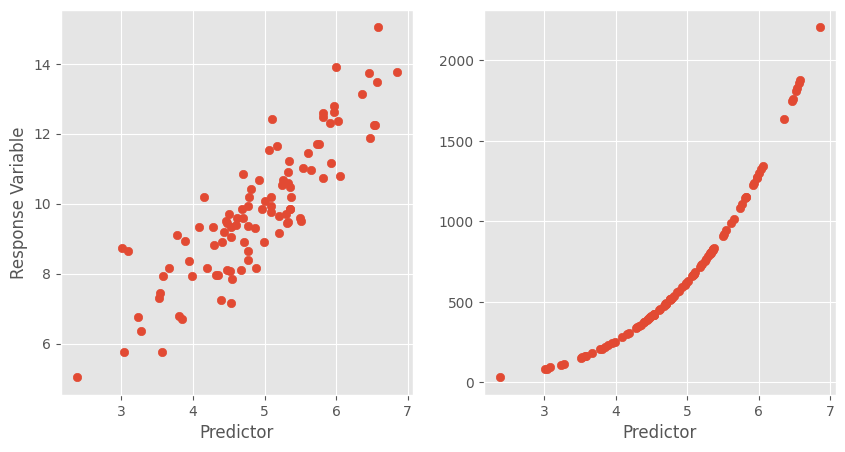

In [42]:
np.random.seed(42)
x = np.random.normal(loc = 5,scale = 1, size = 100)
error = np.random.normal(loc = 0, scale = 1, size = 100)
y = 2*x + error
y2 = x**4 + error
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(x,y)
ax[0].set_xlabel('Predictor')
ax[0].set_ylabel('Response Variable')

ax[1].scatter(x,y2)
ax[1].set_xlabel('Predictor')
ax[1].set_ylabel('')
plt.show()

The data on the left hand side is suitable for LR modeling. The second one is not. Let's model the first one.

In [43]:
model = sm.OLS(y,sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.14e-32
Time:                        12:32:28   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7237      0.523      1.383      0.1

Synthetic data:

$x \sim N(5,1)$

$ϵ \sim N(0,1)$

$y = 2x + ϵ$

The LR model modelled the data with the following equation:

 $\hat{y} = 0.72 + 1.85x$

Not only that, it gave us further information.

* First, the p-value of the intercept is greater than the critical p-value for 95% confidence (0.05). This means that the model is not certain whether the coefficient is different from zero. On the other hand, the LR model is much more confident about the coefficient. These results should seem meaningful since we created the data synthetically (we know the real parameters).

* $R^2$ is a metric which indicates the degree of variance in the data explained by the model. Adjusted $R^2$ is similar but it penalizes $R^2$ to avoid unnecessary predictor usage (simpler model is always better). The adjusted $R^2$ and $R^2$ are similar in this case because we used only one predictor to model the response variable.

## 7.2. Multivariate Linear Regression

When there is more than one predictor, the regression equation is created with matricies. Since we are using matricies anyways, we can put the intercept variable as a vector to these matricies also.

$\hat{y} = Xβ$

$ϵ\sim N(0,\sigma^2)$

Now the least square solution for this model is calculated analytically by using:

$\hat{β} = (X^TX)^{-1}(X^Ty)$



In [44]:
np.random.seed(42)
x = np.random.normal(loc = 5,scale = 1, size = 100)
error = np.random.normal(loc = 0, scale = 1, size = 100)
y = 2*x + error

def OLS_LR(y,X):
    return np.linalg.inv(X.T@X)@X.T@y

beta_manual = OLS_LR(y,sm.add_constant(x))
beta_statsmodels = sm.OLS(y,sm.add_constant(x)).fit().params
print("Manual LR parameters:", beta_manual)
print("Statsmodels LR parameters:", beta_statsmodels)

Manual LR parameters: [0.72371363 1.85674284]
Statsmodels LR parameters: [0.72371363 1.85674284]


Let's make an example.

In [45]:
np.random.seed(42)
x1 = np.random.normal(loc = 5,scale = 1, size = 100)
x2 = np.random.normal(loc = 7,scale = 1, size = 100)
error = np.random.normal(loc = 0, scale = 1, size = 100)
y = 2*x1 + 3*x2 + error

X = np.column_stack((x1,x2))
model = sm.OLS(y,sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     455.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           4.99e-50
Time:                        12:32:28   Log-Likelihood:                -147.62
No. Observations:                 100   AIC:                             301.2
Df Residuals:                      97   BIC:                             309.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9559      1.064     -0.899      0.3

This time the model equation is

$\hat{y} = -0.95 + 2.22x_1 + 2.98x_2$

Again the model is not certain about the intercept but certain about the coefficient.

This time I want to focus on the parameters. For example, each unit of increase in $x_1$ results 2.22 increase in response variable $y$. However, this is a correct interpretiton only if the predictors are independent from each other.

The easiest way to check the independency assumption is to put predictors in a scatterplot:

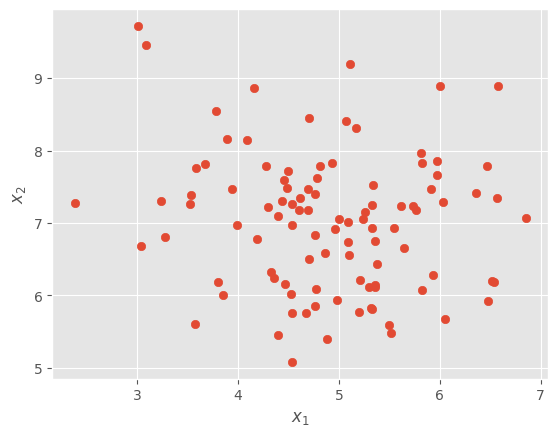

In [46]:
plt.figure()
plt.scatter(x1,x2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

or to make it automatically, one can use `pearson correlation`.

In [47]:
stats.pearsonr(x1,x2)

PearsonRResult(statistic=-0.1364222121700026, pvalue=0.17592555489276998)

From the plots and correlation results, we understand that there is no relationship between $x_1$ and $x_2$.

### 7.2.1. Selecting the Best Model Using Adjusted R2

As I have told before, simpler model is always better if it can accomplish what should be accomplished. That being said, we can optimize our regression model by iteratively adding the predictors to the regression model and check whether adjusted $R^2$ improves:

In [48]:
df = sm.datasets.get_rdataset(dataname='mtcars', package='datasets').data

y = df['mpg']
X = df.drop('mpg', axis=1)

X = sm.add_constant(X)

baseline_model = sm.OLS(y, X).fit()
print(f"Baseline Adjusted R2: {np.round(baseline_model.rsquared_adj,2)}")

best_r2_adj = baseline_model.rsquared_adj
best_model = baseline_model

for i in range(1, len(X.columns)):
    temp_X = X.iloc[:, :i+1]
    temp_model = sm.OLS(y, temp_X).fit()


    if temp_model.rsquared_adj > best_r2_adj:
        print(f"Added variables: {temp_X.columns.tolist()}")
        print(f"Adjusted R2: {np.round(temp_model.rsquared_adj,2)}\n")
        best_r2_adj = temp_model.rsquared_adj
        best_model = temp_model

print(best_model.summary())

Baseline Adjusted R2: 0.81
Added variables: ['const', 'cyl', 'disp', 'hp', 'drat', 'wt']
Adjusted R2: 0.82

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     29.77
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           5.62e-10
Time:                        12:32:30   Log-Likelihood:                -71.883
No. Observations:                  32   AIC:                             155.8
Df Residuals:                      26   BIC:                             164.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

As you can see from the summary, a smaller model has a better adjusted $R^2$ score (0.82) than the a model containing all the features (0.81). Therefore the former should be preferred.

# 8.Logistic Regression

Logistic Regression is a model that is used for binary classification. The model equations are:

$\hat{Y} = Xβ$

$\hat{p} = \frac {exp(\hat{Y})} {1 + exp(\hat{Y})}\quad$ (sigmoid)

$logit(p_i) = ln(\frac{p_i}{1-p_i})$

Assumptions:

* Each $y_i$ is independent.

* Each predictor $x_i$ has a linear relationship with $logit(p_i)$.

Let's look at an example.

In [49]:
X,y = make_classification(n_classes=2,
                          n_samples=1000,
                          n_features = 2,
                          n_redundant=0,
                          n_informative = 2,
                          random_state = 42)

model = sm.Logit(y,sm.add_constant(X)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.330815
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.5227
Time:                        12:32:30   Log-Likelihood:                -330.81
converged:                       True   LL-Null:                       -693.14
Covariance Type:            nonrobust   LLR p-value:                4.412e-158
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2277      0.102      2.237      0.025       0.028       0.427
x1            -0.3023      0.

The logistic regression equations are:

$\hat{y} = 0.22 -0.3x_1 + 2.17x_2$

$\hat{p} = \text{sigmoid}(\hat{y})$

All the parameters have p-value less than p-critical (0.05) so the model is certain about all the intercept and coefficient values.

This is the end of this kernel. Thanks for following...